<a href="https://colab.research.google.com/github/Amruthadronadula/Amrutha/blob/main/Finance_Manager.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing all required python libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt #use to visualize dataset values
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import os
from keras.models import Sequential, load_model
#Sequential: This is a linear stack of layers in Keras, used to build a simple feedforward neural network model.
from keras.layers import Dense, Activation
from keras.layers import Dropout
from keras.callbacks import ModelCheckpoint
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Convolution2D
import pickle
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#class to normalize dataset values
scaler = MinMaxScaler(feature_range = (0, 1))
scaler1 = MinMaxScaler(feature_range = (0, 1))

In [ ]:
#loading and displaying cellular lte dataset
dataset = pd.read_csv("Expenses.csv")
dataset

,Date,Expenses,Category,Amount,Municipality,Province,Region,ID
0,1-15-2020,Transportation,Survival,41.00,Quezon City,Metro Manila,National Capital Region,E2020-1
1,1-15-2020,Transportation,Survival,40.00,Quezon City,Metro Manila,National Capital Region,E2020-2
2,1-16-2020,Food/Drinks,Optional,35.00,Quezon City,Metro Manila,National Capital Region,E2020-3
3,1-16-2020,Eating/Going Out,Optional,139.00,Quezon City,Metro Manila,National Capital Region,E2020-4
4,1-16-2020,Transportation,Survival,40.00,Quezon City,Metro Manila,National Capital Region,E2020-5
...,...,...,...,...,...,...,...,...
1161,7-25-2022,Grocery,Survival,1000.00,Pontevedra,Capiz,Western Visayas,E2022-144
1162,7-29-2022,Bank fees,Optional,25.00,Pontevedra,Capiz,Western Visayas,E2022-145
1163,7-29-2022,Credit Card,Obligation,8124.25,Makati City,Metro Manila,National Capital Region,E2022-146
1164,7-29-2022,Home,Obligation,3000.00,Pontevedra,Capiz,Western Visayas,E2022-147


In [ ]:
#displaying different expenses category found in dataset
expenses_category = np.unique(dataset['Expenses'])
for i in range(len(expenses_category)):
    print("Category ID = "+str(i+1)+" Category Expenses Name = "+expenses_category[i])

Category ID = 1 Category Expenses Name = Apartment
Category ID = 2 Category Expenses Name = Bank fees
Category ID = 3 Category Expenses Name = Cable
Category ID = 4 Category Expenses Name = Clothing/Shoes/Personal Items
Category ID = 5 Category Expenses Name = Credit Card
Category ID = 6 Category Expenses Name = Debt repayment
Category ID = 7 Category Expenses Name = Eating/Going Out
Category ID = 8 Category Expenses Name = Electricity/Water
Category ID = 9 Category Expenses Name = Entertainment/Subscriptions
Category ID = 10 Category Expenses Name = Food/Drinks
Category ID = 11 Category Expenses Name = Garbage
Category ID = 12 Category Expenses Name = Grocery
Category ID = 13 Category Expenses Name = Hair Cut
Category ID = 14 Category Expenses Name = Health Insurance
Category ID = 15 Category Expenses Name = Healthcare
Category ID = 16 Category Expenses Name = Home
Category ID = 17 Category Expenses Name = Magazines/Newspapers/Books
Category ID = 18 Category Expenses Name = Others
Cat

In [ ]:
#finding and displaying count of missing or null values from each column
dataset.isnull().sum()

,0
Date,0
Expenses,0
Category,0
Amount,0
Municipality,0
Province,0
Region,0
ID,0


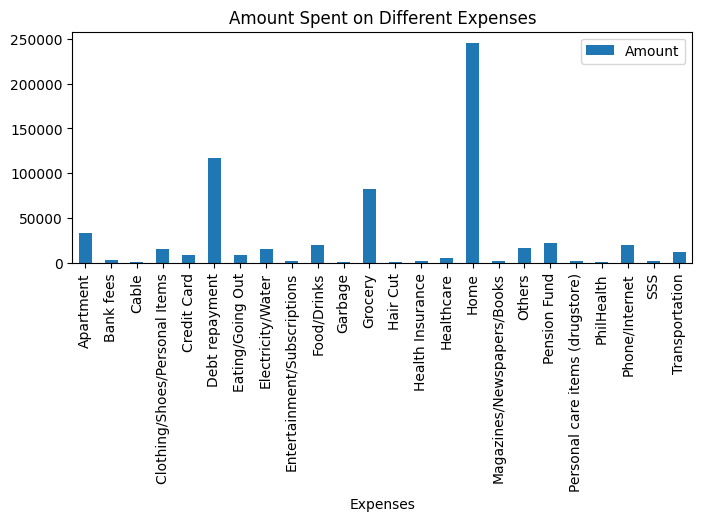

In [ ]:
#Visualizing graph of amount spend on different expenses
data = dataset.groupby(["Expenses"])['Amount'].sum().reset_index()
data.plot(x="Expenses", y="Amount", kind="bar", figsize=(8, 3))
plt.title('Amount Spent on Different Expenses')
plt.show()

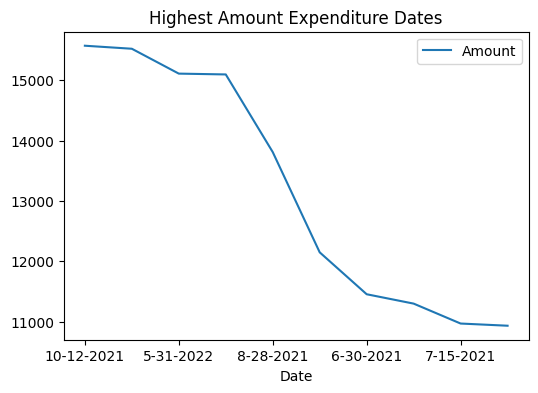

In [ ]:
#Visualizing graph of amount spent on each date
data = dataset.groupby(["Date"])['Amount'].sum().sort_values(ascending=False).reset_index()[:10]
data.plot(x="Date", y="Amount", figsize=(6, 4))
plt.title("Highest Amount Expenditure Dates")
plt.show()

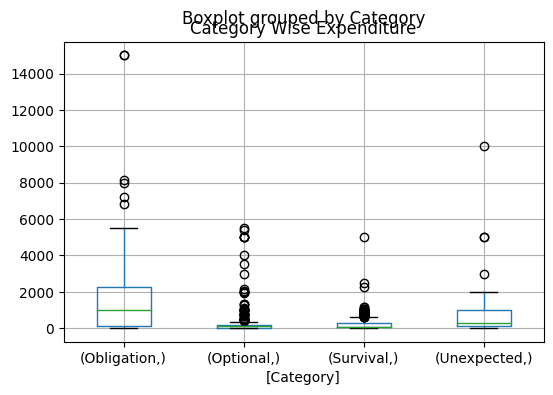

In [ ]:
#Visualizing graph of amount spent on each category
dataset.boxplot(column=['Amount'], by=['Category'], figsize=(6, 4))
plt.title("Category Wise Expenditure")
plt.show()

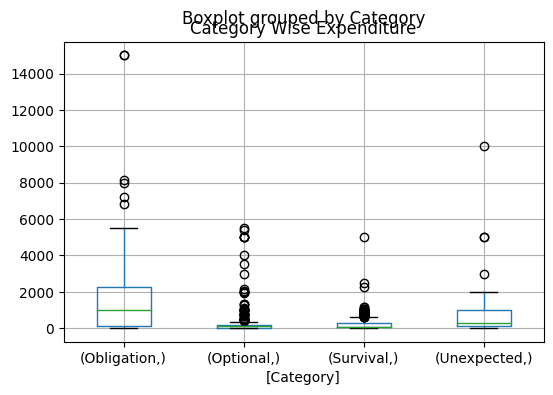

In [ ]:
#Visualizing graph of amount spent on each category
dataset.boxplot(column=['Amount'], by=['Category'], figsize=(6, 4))
plt.title("Category Wise Expenditure")
plt.show()

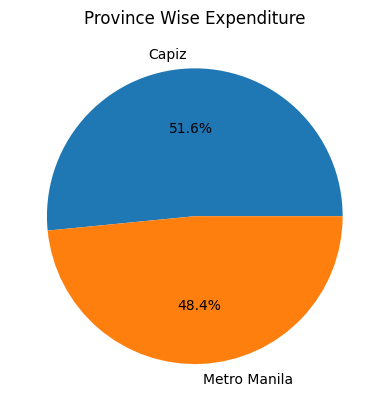

In [ ]:
# visualizing graph of total expenses done at different Province
data = dataset.groupby(["Province"])['Amount'].sum().reset_index()
plt.pie(data['Amount'], labels=data['Province'], autopct='%1.1f%%')
plt.title('Province Wise Expenditure')
plt.show()

In [ ]:
#dataset peprocessing converting datetime to numeric values and non-numeric values to numeric values
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['year'] = dataset['Date'].dt.year
dataset['month'] = dataset['Date'].dt.month
dataset['day'] = dataset['Date'].dt.day
label_encoder = []
columns = dataset.columns
types = dataset.dtypes.values
for i in range(len(types)):
    name = types[i]
    if name == 'object': #finding column with object type
        le = LabelEncoder()
        dataset[columns[i]] = pd.Series(le.fit_transform(dataset[columns[i]].astype(str)))#encode all str columns to numeric
        label_encoder.append([columns[i], le])
#handling and removing missing values
dataset.drop(['Date'], axis = 1,inplace=True)#drop ir-relevant columns
dataset.fillna(0, inplace = True)
print("Cleaned Dataset Values")
dataset

Cleaned Dataset Values


,Expenses,Category,Amount,Municipality,Province,Region,ID,year,month,day
0,23,2,41.00,6,1,0,0,2020,1,15
1,23,2,40.00,6,1,0,111,2020,1,15
2,9,1,35.00,6,1,0,222,2020,1,16
3,6,1,139.00,6,1,0,333,2020,1,16
4,23,2,40.00,6,1,0,415,2020,1,16
...,...,...,...,...,...,...,...,...,...,...
1161,11,2,1000.00,4,0,1,1067,2022,7,25
1162,1,1,25.00,4,0,1,1068,2022,7,29
1163,4,0,8124.25,1,1,0,1069,2022,7,29
1164,15,0,3000.00,4,0,1,1070,2022,7,29


In [ ]:
#function to normalize loaded dataset values
Y = dataset.values[:,2:3]
dataset.drop(['Amount'], axis = 1,inplace=True)
X = dataset.values
X = scaler.fit_transform(X)
Y = scaler1.fit_transform(Y)
print("Normalized Features = "+str(X))

Normalized Features = [[1.         0.66666667 0.85714286 ... 0.         0.         0.46666667]
 [1.         0.66666667 0.85714286 ... 0.         0.         0.46666667]
 [0.39130435 0.33333333 0.85714286 ... 0.         0.         0.5       ]
 ...
 [0.17391304 0.         0.14285714 ... 1.         0.54545455 0.93333333]
 [0.65217391 0.         0.57142857 ... 1.         0.54545455 0.93333333]
 [0.         0.         0.85714286 ... 1.         0.54545455 0.93333333]]


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
print("Train & Test Dataset Split")
print("Total records found in dataset = "+str(X.shape[0]))
print("Total features found in dataset= "+str(X.shape[1]))
print("80% records used to train AI Algorithms : "+str(X_train.shape[0]))
print("20% records features used to AI Algorithms : "+str(X_test.shape[0]))
data = np.load("data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = data

Train & Test Dataset Split
Total records found in dataset = 1166
Total features found in dataset= 9
80% records used to train AI Algorithms : 932
20% records features used to AI Algorithms : 234


In [ ]:
#defining global variables to save algorithm performnace metrics
rsquare = []
mse = []
rmse = []

In [ ]:
#function to calculate MAPE, RMSE and R2Square from predicted and true values
def calculateMetrics(algorithm, predict, test_labels):
    mse_error = mean_squared_error(test_labels, predict)
    predict = predict.reshape(-1, 1)
    predict = scaler1.inverse_transform(predict)
    test_label = scaler1.inverse_transform(test_labels)
    predict = predict.ravel()
    test_label = test_label.ravel()
    r2_scores = r2_score(test_label, predict)
    rmse_error = sqrt(mse_error)
    rsquare.append(r2_scores)
    mse.append(mse_error)
    rmse.append(rmse_error)
    print()
    print(algorithm+" MSE : "+str(mse_error))
    print(algorithm+" RMSE : "+str(rmse_error))
    print(algorithm+" R2 : "+str(r2_scores))
    print()
    for i in range(0, 10):
        print("True Expenditure Amount : "+str(test_label[i])+" Predicted Expenditure Amount : "+str(predict[i]))
    plt.figure(figsize=(5,3))
    plt.plot(test_label[0:100], color = 'red', label = 'True Expenses')
    plt.plot(predict[0:100], color = 'green', label = 'Predicted Expenses')
    plt.title(algorithm+' Expenditure Forecasting Graph')
    plt.xlabel('Number of Test Samples')
    plt.ylabel('Expenditure Forecasting')
    plt.legend()
    plt.show()


Random Forest MSE : 0.000388675219247209
Random Forest RMSE : 0.019714847685113092
Random Forest R2 : 0.9374802140060243

True Expenditure Amount : 99.0 Predicted Expenditure Amount : 333.94479999999965
True Expenditure Amount : 70.0 Predicted Expenditure Amount : 69.28000000000014
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 30.04000000000003
True Expenditure Amount : 175.0 Predicted Expenditure Amount : 119.53999999999982
True Expenditure Amount : 135.0 Predicted Expenditure Amount : 334.9210000000001
True Expenditure Amount : 71.0 Predicted Expenditure Amount : 76.50000000000009
True Expenditure Amount : 48.0 Predicted Expenditure Amount : 61.66000000000005
True Expenditure Amount : 8124.25 Predicted Expenditure Amount : 6002.578899999998
True Expenditure Amount : 1300.0 Predicted Expenditure Amount : 1729.7
True Expenditure Amount : 164.0 Predicted Expenditure Amount : 132.78000000000003


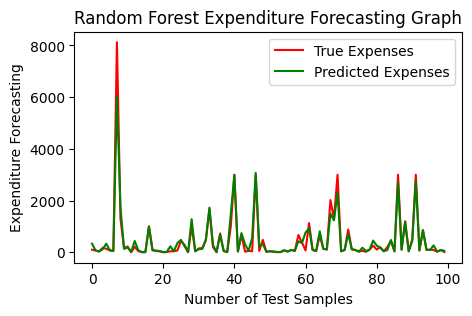

In [ ]:
#training Random Forest algorithm on training features and evaluating regression performance on test data
rf_cls = RandomForestRegressor()
rf_cls.fit(X_train, y_train.ravel())
#perform prediction on test datat
predict = rf_cls.predict(X_test)
#call this function to calculate performance metrics
calculateMetrics("Random Forest", predict, y_test)


Decision Tree MSE : 3.2878921758238916e-05
Decision Tree RMSE : 0.005734014453961458
Decision Tree R2 : 0.9947113089534778

True Expenditure Amount : 99.0 Predicted Expenditure Amount : 99.0
True Expenditure Amount : 70.0 Predicted Expenditure Amount : 69.99999999999999
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 35.0
True Expenditure Amount : 175.0 Predicted Expenditure Amount : 175.0
True Expenditure Amount : 135.0 Predicted Expenditure Amount : 135.0
True Expenditure Amount : 71.0 Predicted Expenditure Amount : 71.0
True Expenditure Amount : 48.0 Predicted Expenditure Amount : 48.0
True Expenditure Amount : 8124.25 Predicted Expenditure Amount : 8124.25
True Expenditure Amount : 1300.0 Predicted Expenditure Amount : 1300.0
True Expenditure Amount : 164.0 Predicted Expenditure Amount : 164.0


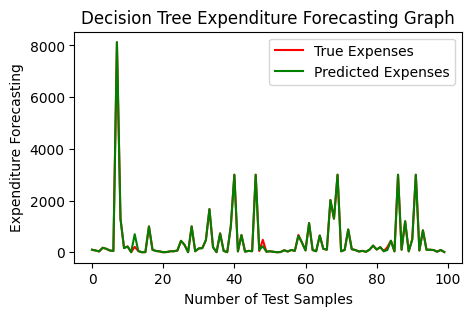

In [ ]:
#training propose AM-CTP Linear Regression algorithm
dt_cls = DecisionTreeRegressor()
dt_cls.fit(X_train, y_train.ravel())
#perform prediction on test data
predict = dt_cls.predict(X_test)
#call this function to calculate performance metrics
calculateMetrics("Decision Tree", predict, y_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

CNN MSE : 0.0011095978616560258
CNN RMSE : 0.03331062685774655
CNN R2 : 0.8215172590377946

True Expenditure Amount : 99.0 Predicted Expenditure Amount : 105.780815
True Expenditure Amount : 70.0 Predicted Expenditure Amount : 13.879707
True Expenditure Amount : 35.0 Predicted Expenditure Amount : 66.41087
True Expenditure Amount : 175.0 Predicted Expenditure Amount : -135.50693
True Expenditure Amount : 135.0 Predicted Expenditure Amount : 408.7026
True Expenditure Amount : 71.0 Predicted Expenditure Amount : -23.42548
True Expenditure Amount : 48.0 Predicted Expenditure Amount : 65.07331
True Expenditure Amount : 8124.25 Predicted Expenditure Amount : 7896.4985
True Expenditure Amount : 1300.0 Predicted Expenditure Amount : 1164.2533
True Expenditure Amount : 164.0 Predicted Expenditure Amount : 145.6972


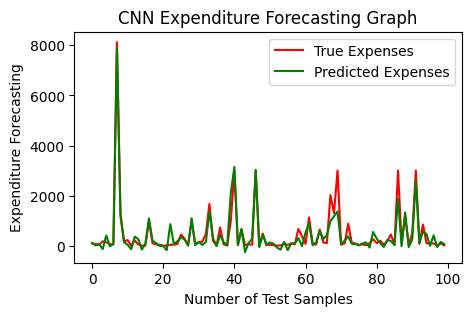

In [ ]:
#now train & plot CNN crop yield prediction
X_train1 = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1, 1))
X_test1 = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1, 1))
#training CNN model
cnn_model = Sequential()
cnn_model.add(Convolution2D(32, (1 , 1), input_shape = (X_train1.shape[1], X_train1.shape[2], X_train1.shape[3]), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Convolution2D(32, (1, 1), activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size = (1, 1)))
cnn_model.add(Flatten())
cnn_model.add(Dense(units = 64, activation = 'relu'))
cnn_model.add(Dense(units = 1))
cnn_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
if os.path.exists("cnn_weights.hdf5") == False:
    model_check_point = ModelCheckpoint(filepath='cnn_weights.hdf5', verbose = 1, save_best_only = True)
    cnn_model.fit(X_train1, y_train, batch_size = 16, epochs = 100, validation_data=(X_test1, y_test), callbacks=[model_check_point], verbose=1)
else:
    cnn_model.load_weights("cnn_weights.hdf5")
predict = cnn_model.predict(X_test1)
calculateMetrics("CNN", predict, y_test)#call function to plot LSTM crop yield prediction

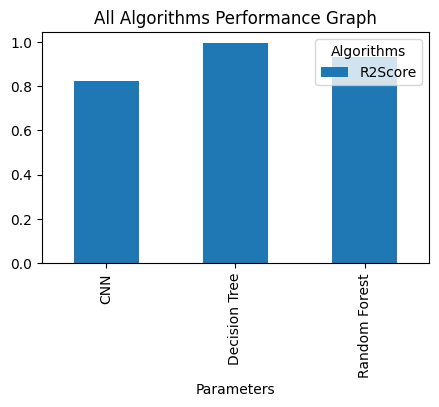

In [ ]:
#all algorithms R2 Score Graph

df = pd.DataFrame([['Random Forest','R2Score',rsquare[0]],
                    ['Decision Tree','R2Score',rsquare[1]],
                    ['CNN','R2Score',rsquare[2]],
                  ],columns=['Parameters','Algorithms','Value'])
# Change the pivot function call to use keyword arguments
df.pivot(index="Parameters", columns="Algorithms", values="Value").plot(kind='bar', figsize=(5,3))
plt.title("All Algorithms Performance Graph")
plt.show()

In [ ]:
#display all algorithm performnace in tabular format
algorithms = ['Random Forest', 'Decision Tree', 'CNN']
data = []
for i in range(len(rmse)):
    data.append([algorithms[i], rsquare[i], rmse[i], mse[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'R2 Score', 'RMSE', 'MSE'])
data

,Algorithm Name,R2 Score,RMSE,MSE
0,Random Forest,0.933115,0.020391,0.000416
1,Decision Tree,0.994711,0.005734,0.000033
2,CNN,0.821517,0.033311,0.001110


In [ ]:
#read test values from test dataset file and then predict cellular traffic demand
test_data = pd.read_csv("testData.csv")#reading test data values
temp = test_data.values
test_data['Date'] = pd.to_datetime(test_data['Date'])#convert datetime to numeric format
test_data['year'] = test_data['Date'].dt.year
test_data['month'] = test_data['Date'].dt.month
test_data['day'] = test_data['Date'].dt.day
test_data.drop(['Date'], axis = 1,inplace=True)
for i in range(len(label_encoder)):
    le = label_encoder[i]
    test_data[le[0]] = pd.Series(le[1].transform(test_data[le[0]].astype(str)))#encode all str columns to numeric
#handling and removing missing values
test_data.fillna(0, inplace = True)
test_data = test_data.values
test_data = scaler.transform(test_data)#select features using select k-best
predict = dt_cls.predict(test_data)#perform prediction using XGBOOST on test data
predict = predict.reshape(-1, 1)
predict = scaler1.inverse_transform(predict)#denormalize pedicted demand
for i in range(len(predict)):
    print("Test Data = "+str(temp[i])+" Future Forecasted Expenses = "+str(predict[i,0]))
    print()

Test Data = ['1-15-2020' 'Transportation' 'Survival' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-1'] Future Forecasted Expenses = 40.99999999999999

Test Data = ['4-9-2020' 'Phone/Internet' 'Optional' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-203'] Future Forecasted Expenses = 100.0

Test Data = ['4-10-2020' 'Food/Drinks' 'Optional' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-204'] Future Forecasted Expenses = 6.0

Test Data = ['4-11-2020' 'Grocery' 'Survival' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-205'] Future Forecasted Expenses = 666.06

Test Data = ['10-16-2020' 'Grocery' 'Survival' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-390'] Future Forecasted Expenses = 489.6

Test Data = ['10-16-2020' 'Grocery' 'Survival' 'Quezon City' 'Metro Manila'
 'National Capital Region' 'E2020-391'] Future Forecasted Expenses = 135.0

Test Data = ['1-31-2021' 'Apartment' 'Obligation' 'Quezon City' 'M

In [ ]:
def recommendation(svd_model, item, top_n_community = 5):
    index = item - 1
    row = svd_model[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', svd_model, svd_model))
    similarity = np.dot(row, svd_model.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n_community]

In [ ]:
dataset = pd.read_csv("Expenses.csv")
expenses = np.unique(dataset['Expenses'].ravel())
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset['Day'] = dataset['Date'].dt.dayofyear
dataset = pd.pivot_table(dataset,values='Amount',index='Expenses',columns='Day')
dataset.fillna(0, inplace = True)
u, s, svd_matrix = np.linalg.svd(dataset, full_matrices=False)
print("Recommendation Model Generated")

Recommendation Model Generated


In [ ]:
category_id = input("Please Expenses Category ID for Recommendation : ")
category_id = int(category_id)
recommend = recommendation(svd_matrix, category_id)
print("Recommended Expenses List\n")
for i in range(len(recommend)):
    print(expenses[recommend[i]])

Please Expenses Category ID for Recommendation : 13
Recommended Expenses List

Hair Cut
Home
Transportation
Healthcare
Grocery
